In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px;}</style>"));

### Prelude

It is now the last year, hopefully, of my PhD. I am searching jobs as a data scientist. Things don't go as smoothly as I expected. Interview after interview, rejection after rejection! Staying in the Ivory tower of theoretical physics for a long time, when confronting the reality outside, I feel great frustration. This feeling get exaggerated in this cold, lifeless winter of Buffalo.  

Life needs spice. Here is one. An lovely question I encountered during one of my interviews.

### The question  
You have a deck with N different playing cards, equally distributed amongst M suits. You draw all cards without putting any back in the deck. After drawing the first card, you compare the suit of each subsequent card drawn with the suit of the card drawn immediately before. If the suits match, you get a point. Otherwise, you get no points. 

At the end of the process, you get a total of P points. What is the conditional probability that P is greater than 12 given that it is greater than 6 when N=52 and M=4?

### Geometric Interpretation   
Let's think in this way:  Our problem only concerns which suit a card belongs to, not the value of the card. Therefore, we can assume all cards in each suit are identical. This reduces the total number of different draws to consider, but does not affect the probabilities for the score we obtain.  

Now geometrically, the problem becomes a path problem as follows.

Suppose the number of suits is 2, and each suit has 5 values. Then the problem is equivalent to find a path to go from the bottom-left corner to the upper-right corner in a $5\times 5$ lattice. We are restricted to move only upward and rightward. Along each path, if there are consecutive upward or consecutive rightward steps, we gain one point. Adding points from all these steps yields the point of the path.   

Here is what some example paths are like in 2 dimensions. The score we gain from path 1 (green) is $4+4=8$, and that for path 2 (red) is $1+1=2$.

<img src="path.png">

### Path Description
To solve is to describe.  

For M suits and L cards per suit, there are a total of ${(ML)!}\big/{(L!)^M}$ different paths. So how to describe each path under the above condition? 

One good way is cutting. For x-direction, if we seek a path with $n_x$ x-segments, just put L identical cards along a line, and use $(n_x-1)$ cuts get $n_x$ segments, each with a positive number of cards. Of course, we have $C_{L-1}^{n_x-1}$ ways to do this. Each such cutting would produce $(L-n_x)$ points, according to the rules in the question. Different ways of cutting can result in the same segments put in different orders. But that is OK. They simply represent different paths with the same score awarded by movements in the x-direction.  

Next, consider y-coordinate. Consider $M=2$. After each x-step/segment, we do a y-step/segment. Otherwise, two consecutive x-steps combine to form one x-step. After a y-step/segment, we do an x-step/segment. One thing to note is, however, we can end with x-step or y-step, even though we explicitly start with x-step. Therefore, to use x-segment series and y-segment series to comprise a path, we can use m x-segments with m y-segments, or m x-segments with (m-1) y-segments.  

Another good thing, we don't need to worry about the order when combining x with y segments. x first, y second, x third, y fourth, etc. That is to say, the order is predetermined already. 

### Ordering  
Here comes one complication, ordering.  

For a two-dimensional lattice, ordering does not pose a big problem. Given the number of x-segments and y-segments, the number of orderings is 0, 1 or 2. Once the path is started, there is not much freedom left. The follower of x must be y, and the follower of y must be x. But if, for example, $M=3$, i.e. a 3-dimensional grid, x-y-z-x-y-z is OK, but x-y-z-y-z-y-z-y-z-x is also OK. We need ways to disentangle this complication.  

Suppose the total number of segments from all directions is n. Let's now label these segments with x, y, or z. Starting with x, we have $(M-1)^{n-1}$ ways to label the remaining segments. Then, for each labeling, use our cutted-out segments above to calculate the points earned.  

However, the above method has a practical issue. There are a total of $(M-1)^n$ orderings. This number is astronomical as long as $M>2$. Remember n can be as large as $ML$. 

Here is a way of re-organization. Suppose $M = 3$. Partition the number of orderings for $n_x$ x's, $n_y$ y's and $n_z$ z's, according to the starting direction. That is :  
$$N_{n_x, n_y, n_z} = N^x_{n_x, n_y, n_z} + N^y_{n_x, n_y, n_z} + N^z_{n_x, n_y, n_z}$$.  

Now an iteration relation comes about, because each $N^{x,y,z}$ can be deduced from $N^{x,y,z}$ with n lower by 1.  
$$N^x_{n_x, n_y, n_z} = N^y_{n_x-1, n_y, n_z} + N^z_{n_x-1, n_y, n_z}$$  
$$N^y_{n_x, n_y, n_z} = N^x_{n_x, n_y-1, n_z} + N^z_{n_x, n_y-1, n_z}$$  
$$N^z_{n_x, n_y, n_z} = N^x_{n_x, n_y, n_z-1} + N^y_{n_x, n_y, n_z-1}$$  

The obvious advantage of this method is the reduced number of computations. For first step back, we do 3 calculations; for the second step back, we do $3\times 2$ computations; next $3\times 2\times 2$; ...; the last one needs $3*2^{n}$. So a total of $3(2+4+...+2^n)\approx 3*2^{n+1}$. Still astronomical...  

Wait!  

That is not what my PC really does. In fact, we do it from bottom up, from $N^{x,y,z}_{1,1,1}$ to $N^{x,y,z}_{2,1,1}$, to $N^{x,y,z}_{2,2,1}$, ... In this way, we get a number, not a formula, after each calculation. And we calculate each quantity only once! That is what we want, i.e. avoidance of repetition. So the number of computations we need is just the number of values to be calculated along the way, that is $M n_x n_y n_z$. This number is much more lovely, right? 

Better than that! We don't do the above iteration for each $(n_x,n_y,n_z)$. We do it once for all! That is, a total of $M L^M$ calculations!

### Boundary conditions
To apply the above iteration equation, we can start in the order of increasing n, where, let's remember, n is the total number of segments. n goes from $M$ to $M*L$. We can see the orderings for one certain n are dependent only on the orderings for n-1. So my logic is clean!


<table><tr><td><img src='hypersurface-x.png'></td><td><img src='hypersurface-y.png'></td></tr></table>


But before we get our hands dirty, we need to specify the boundary conditions. In 2 dimensions, $N^x_{1,1}=1$ and $N^y_{1,1}=1$ are enough. All the other starting points in the figure above give zeros. For example, $N^x_{1,2}=0$ and $N^y_{2,1}=0$.  

But in order to generalize to higher dimensions, we need to think reductionally. For an n-dimensional grid, the values at the starting hypersurfaces are $N^x_{1,n_y,n_z,...}$, $N^y_{n_x, 1,n_z,...}$, etc. These should equal the total number of orderings in an (n-1)-dimension grid. Therefore, we start from dimension 1. Then use the vector of total orderings as the boundary conditions for 2 dimensions. Then use the result matrix of total orderings in 2 dimensions as the boundary conditions for 3 dimensions. This trick leads us to dimensions as high as we like. I apologize for not being able to draw in high dimensions. Chew on these words for a while, and you would know what I am saying.

### Summary  
To summarize our strategy above. We consider cards within one suit as identical. We then get a geometrical problem of finding paths in a M-dimensional grid. Each path carries equal weight of probability. We assign to each path a score, which depends only on the number of x-segments, the number of y-segments, etc. Then to count the number of paths for each segmentation, we devise two steps. Step one: count the number of permutations of $n_x$ x-segments, $n_y$ y-segments, etc. Step two: count the number of possible length of each segment, e.g. by applying $n_x-1$ internal cuts on a line of with $L$ cards. Step one is useful for weights; step two is useful for score. To compute the number of orderings, we start from 1 dimension, then use its result as the boundary condition for 2 dimensions. The iteration relation leads us to indreasing n, from $M$ to $ML$, i.e. a path purely composed of segments with unit length.

#### Now let's get dirty!

In [2]:
import numpy as np
from scipy.special import binom
from math import factorial
import matplotlib.pyplot as plt

We first code the function to compute the number of orderings.

In [3]:
def ordering(M=1,L=13,initial=1):
    
    # define a M-list. The ith element is the number of orderings starting from i-coordinate
    Narray = [None]*M

    #initialize the coordinates
    coord = np.zeros(M, dtype=np.int8)
    
    def hypersurface(i, n):

        if i < M-1:
            # the coordinate is calculated during the M recursions
            for x in range(np.maximum(n-(M-1-i)*L,1), 1+np.minimum(n-(M-1-i), L)):
                coord[i] = x
                hypersurface(i+1, n-x)

        # make sure we are calculate for a const sum of coordinates
        elif i==(M-1):
            coord[i] = n
            hypersurface(i+1,0)

        else:
            for j in range(M):
                # previous coordinate = current coordinate - (0,0,...1,...,0,0)
                diff = np.zeros(M, dtype=np.int8)
                diff[j] = 1
                pre_coord = coord - diff

                # our iteration relation
                for k in range(M):
                    if k != j:
                        Narray[j][tuple(coord)] = Narray[j][tuple(coord)] + Narray[k][tuple(pre_coord)]
                        
    # Initialize the grids 
    for i in range(M):
        Narray[i] = np.zeros(shape=tuple([L+1]*M))

        # Initialize i-hypersurface with the result of M-1
        indices = (np.array(M*list(np.arange(L+1))).reshape(M,L+1)).tolist()
        indices[i] = [1]
        Narray[i][np.ix_(*indices)] = np.expand_dims(initial,axis=i) # expand_dims used to match the dimensionality, * to remove the bracket of a list

    # calculate from hypersurface with cooordinate-sum n, to that with coordinate-sum n+1
    for n in range(M+1, M*L+1):
        hypersurface(0,n)

    n_orderings = np.zeros(shape=tuple([L+1]*M))
    for i in range(M):
        n_orderings = n_orderings + Narray[i]
    return n_orderings

In [4]:
M=4
L=13
n_orderings = 1 # for 0 dimension

# calculate number of orderings for dimension N down from dimension 1 
for n in range(1,M+1):
    n_orderings = ordering(n, L=L, initial=n_orderings)

We can see that the number of orderings grow exponentially with the number of cards.

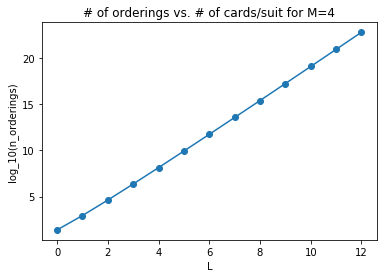

In [5]:
# plot the number of orderings vs. L
temp = []
for n in range(1,L+1):
    temp.append(n_orderings[n,n,n,n])
    
import matplotlib.pyplot as plt
plt.plot(np.log10(temp),'-o');
plt.xlabel('L');
plt.ylabel('log_10(n_orderings)');
plt.title('# of orderings vs. # of cards/suit for M=4');

Now we calculate the number of different paths for each score.

In [6]:
# calculate the # of paths for each score
def score_paths(i, n):
    global tot_paths
    if i < (M-1):
        # the coordinate is calculated during the M recursions
        for x in range(np.maximum(n-(M-1-i)*L,1), 1+np.minimum(n-(M-1-i), L)):
            coord[i] = x
            score_paths(i+1, n-x)
    # make sure we are calculate for a const sum of coordinates
    elif i==(M-1):
        coord[i] = n
        score_paths(i+1,0)
    else:
        this_paths = n_orderings[tuple(coord)]
        for j in range(M):
            this_paths = this_paths * binom(L-1, coord[j]-1)
        tot_paths = tot_paths + this_paths
        
        
coord = np.zeros(M, dtype=np.int8)
my_score = M*L - np.arange(M, M*L+1)
my_paths = np.arange(M, M*L+1, dtype=float)

for n in range(M, M*L+1):
    tot_paths = 0
    score_paths(0,n)
    my_paths[n-M] = tot_paths

Now we can calculate the probability distribution of the score we get after drawing all cards. The mean and standard deviation can be then easily calculated. A comparison with a normal distribution is illuminating!

In [7]:
# probability distribution
prob = my_paths/sum(my_paths)
mean=sum(prob*my_score)
std = np.sqrt(sum(prob*(my_score-mean)**2))
def norm(x):
    return 1/(np.sqrt(2*np.pi)*std) * np.exp(-(x-mean)**2/(2*std**2))

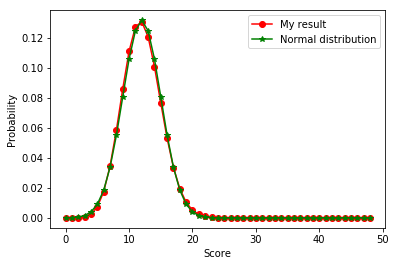

In [8]:
plt.plot(my_score, prob,'-or')
plt.plot(my_score,norm(my_score),'-*g')
plt.legend(['My result','Normal distribution'])
plt.xlabel('Score');
plt.ylabel('Probability');

I would like to leave the original question to the reader. Wish a gentle sense of accomplishment be a warm breeze, especially during the cold winter in your life.

嗟夫！予尝求古仁人之心，或异二者之为，何哉？不以物喜，不以己悲。 居庙堂之高则忧其民，处江湖之远则忧其君。是进亦忧，退亦忧。然则何时而乐耶？其必曰“先天下之忧而忧，后天下之乐而乐”乎。噫！微斯人，吾谁与归？